# Kaggle
## House Prices - Advanced Regression Techniques  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_all = pd.read_csv('train_mdf.csv')

In [3]:
df_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_all.shape

(1460, 81)

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_all.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df = df_all.drop(['Id'], axis=1, inplace=False)

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Features Type

In [9]:
'''
typelist = []

for col in df.columns:
    dtype = df[col].dtype
    typelist.append(dtype)

typearr = np.array(typelist)

np.unique(typearr, return_counts=True)
'''

'\ntypelist = []\n\nfor col in df.columns:\n    dtype = df[col].dtype\n    typelist.append(dtype)\n\ntypearr = np.array(typelist)\n\nnp.unique(typearr, return_counts=True)\n'

In [10]:
df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [11]:
df.dtypes == "object"

MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition     True
SalePrice        False
Length: 80, dtype: bool

In [12]:
df.select_dtypes("object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [13]:
df.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
df.select_dtypes('int64')

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [15]:
df.select_dtypes('int64').columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
df.select_dtypes('float64')

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [17]:
df.select_dtypes('float64').columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [18]:
# Categorical Features
cat_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [19]:
# Numerical Features including SalePrice (int64 & float64)
tNum_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
               'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [20]:
# Numerical Features (int64 & float64)
num_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
               'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [21]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [22]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### (var dataframe에 dtype column 삽입 실패)

In [23]:
var = pd.read_csv('variables.csv')

In [24]:
var.head()

,Index,variable,description,data_type,scale(lv-of-measurement),res_options
0,1,MSSubClass,Identifies the type of dwelling involved in th...,NaN,cat-nominal,16.0
1,2,MSZoning,Identifies the general zoning classification o...,NaN,cat-nominal,8.0
2,3,LotFrontage,Linear feet of street connected to property,NaN,NaN,NaN
3,4,LotArea,Lot size in square feet,NaN,NaN,NaN
4,5,Street,Type of road access to property,NaN,cat-nominal,2.0


In [42]:
type(df.dtypes)

pandas.core.series.Series

In [56]:
dtype = df.dtypes

In [63]:
dtype_df = dtype.to_frame()

In [57]:
dtype.to_frame()

,0
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [52]:
MSSubClass	int64

In [58]:
# Error 해결 안 됨
dtype[['var', 'data_type']] = pd.DataFrame(dtype.str.split('	', 2).tolist())

KeyError: "None of [Index(['var', 'data_type'], dtype='object')] are in the [index]"

In [49]:
dtype.to_frame()[0]

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Name: 0, Length: 80, dtype: object

In [67]:
var = var.drop('data_type', axis=1)
var.head()

,Index,variable,description,scale(lv-of-measurement),res_options
0,1,MSSubClass,Identifies the type of dwelling involved in th...,cat-nominal,16.0
1,2,MSZoning,Identifies the general zoning classification o...,cat-nominal,8.0
2,3,LotFrontage,Linear feet of street connected to property,NaN,NaN
3,4,LotArea,Lot size in square feet,NaN,NaN
4,5,Street,Type of road access to property,cat-nominal,2.0


In [68]:
var.insert(3, 'data_type', dtype_df)
var.head()

,Index,variable,description,data_type,scale(lv-of-measurement),res_options
0,1,MSSubClass,Identifies the type of dwelling involved in th...,NaN,cat-nominal,16.0
1,2,MSZoning,Identifies the general zoning classification o...,NaN,cat-nominal,8.0
2,3,LotFrontage,Linear feet of street connected to property,NaN,NaN,NaN
3,4,LotArea,Lot size in square feet,NaN,NaN,NaN
4,5,Street,Type of road access to property,NaN,cat-nominal,2.0


## Descriptive Statistics

In [ ]:
import pandas_profiling
df.profile_report()

### Target Variable : Sale Price

In [ ]:
sns.countplot(x='SalePrice', data=df)

In [ ]:
plt.title('Sale Price')
plt.hist(df['SalePrice'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

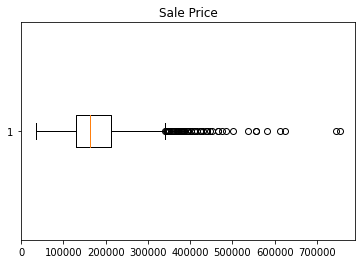

In [154]:
plt.title('Sale Price')
plt.boxplot(df['SalePrice'], vert=False)
plt.show

In [ ]:
sns.histplot(x='SalePrice', data=df)

In [ ]:
plt.title('Sale Price')
sns.distplot(df.SalePrice)

In [ ]:
np.round(df['SalePrice'].describe(), 4)

In [156]:
'''
def get_outlier(df=None, column=None, weight=1.5):
    
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index
'''

quantile_25 = np.percentile(df['SalePrice'].values, 25)
quantile_75 = np.percentile(df['SalePrice'].values, 75)

iqr = quantile_75 - quantile_25

In [157]:
iqr

84025.0

In [158]:
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

In [160]:
lowest_val

3937.5

In [159]:
highest_val

340037.5

### Features

#### Numerical Variable

In [ ]:
# 연속형 변수들 histplot
fig, axs = plt.subplots(figsize=(20, 45), ncols=4, nrows=9)

for i, feature in enumerate(num_features):
    row = int(i/4)
    col = i%4
    
    sns.histplot(x=feature, data=df, ax=axs[row][col])

In [ ]:
# 연속형 변수들 간의 상관계수
sns.pairplot(df, vars=tNum_features)

### Features: Date

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

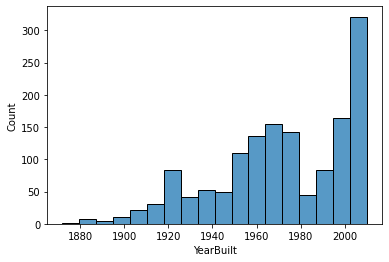

In [71]:
sns.histplot(x='YearBuilt', data=df)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

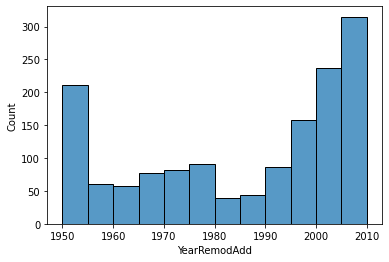

In [72]:
sns.histplot(x='YearRemodAdd', data=df)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

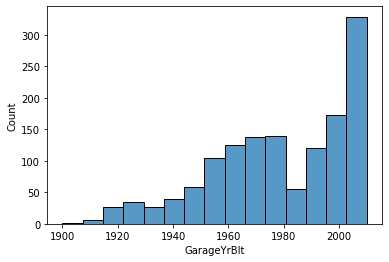

In [73]:
sns.histplot(x='GarageYrBlt', data=df)

<AxesSubplot:xlabel='MoSold', ylabel='Count'>

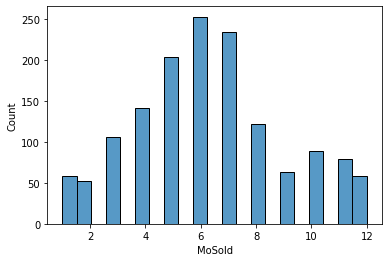

In [92]:
sns.histplot(x='MoSold', data=df)
# plt.xlim(0, 12)
# plt.xticks(np.arange(1, 13))

([<matplotlib.axis.XTick at 0x1c07467b348>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

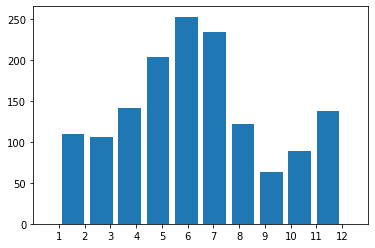

In [109]:
plt.hist(x='MoSold', data=df, rwidth = .8, alpha=1)
plt.xlim(0, 13)
plt.xticks(np.arange(1, 13))
# plt.grid()

In [128]:
df['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

([<matplotlib.axis.XTick at 0x1c07454bd48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

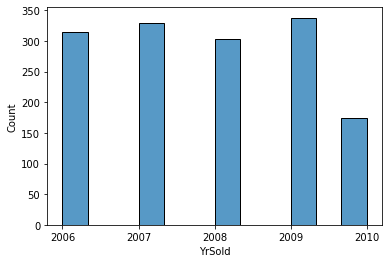

In [127]:
sns.histplot(x='YrSold', data=df)
# plt.xlim(2006, 2010)
plt.xticks(df['YrSold'].unique())

In [112]:
df['YrSold'].nunique()

5

In [118]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [122]:
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [150]:
dateVar = df[['YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]
dateVar2 = df[['YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice']]
dateVar.head()

,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
0,2008,2,2003,2003,2003.0
1,2007,5,1976,1976,1976.0
2,2008,9,2001,2002,2001.0
3,2006,2,1915,1970,1998.0
4,2008,12,2000,2000,2000.0


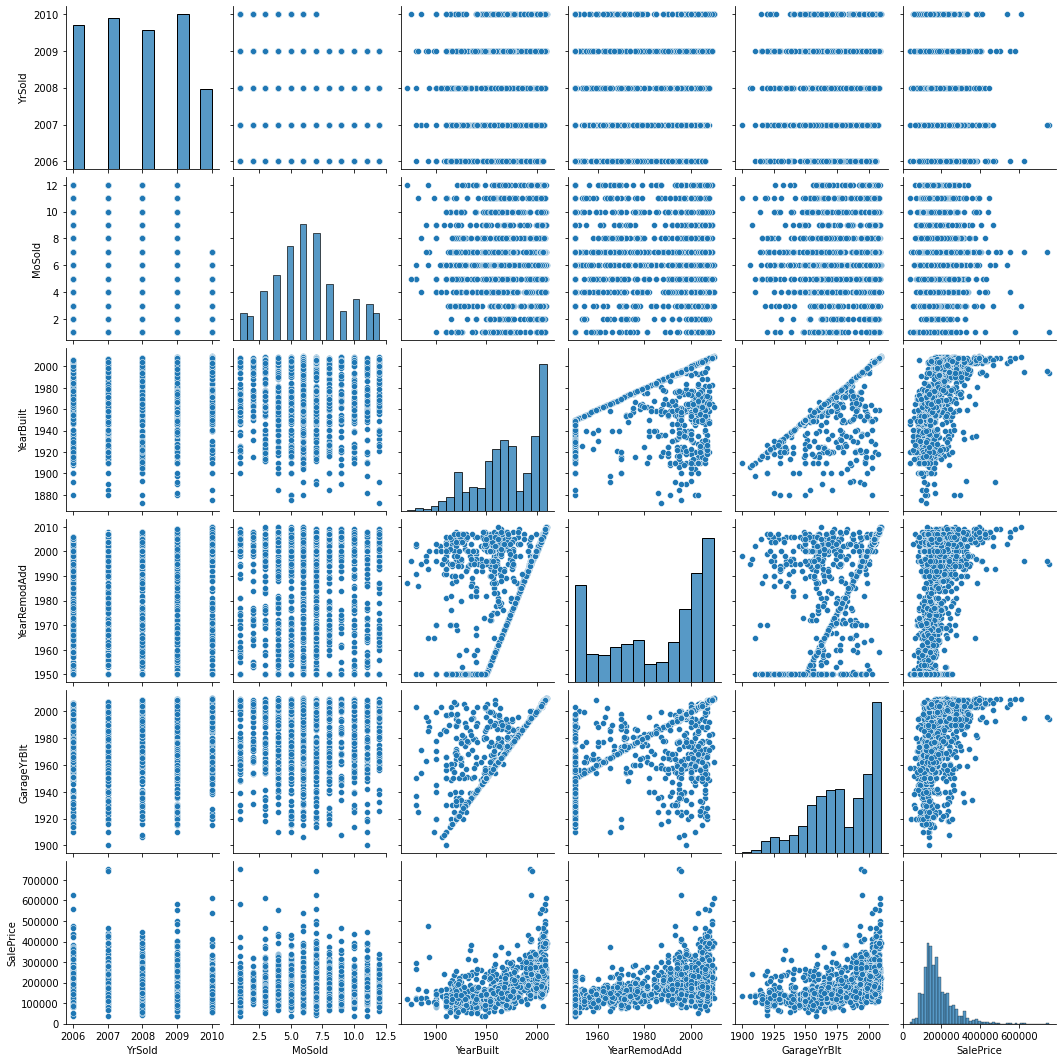

In [129]:
# Time Variables Pairplot
sns.pairplot(df, vars=['YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice'])

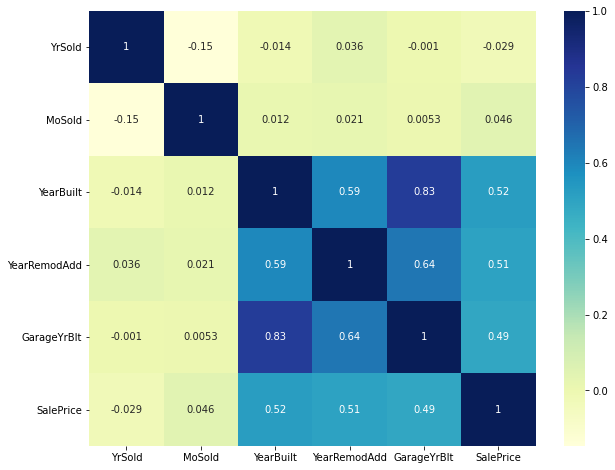

In [152]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dateVar2.corr(), annot=True, cmap='YlGnBu', ax=ax)
plt.show()

### Features: Area

In [140]:
areaVar = df[['LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'PoolArea']]

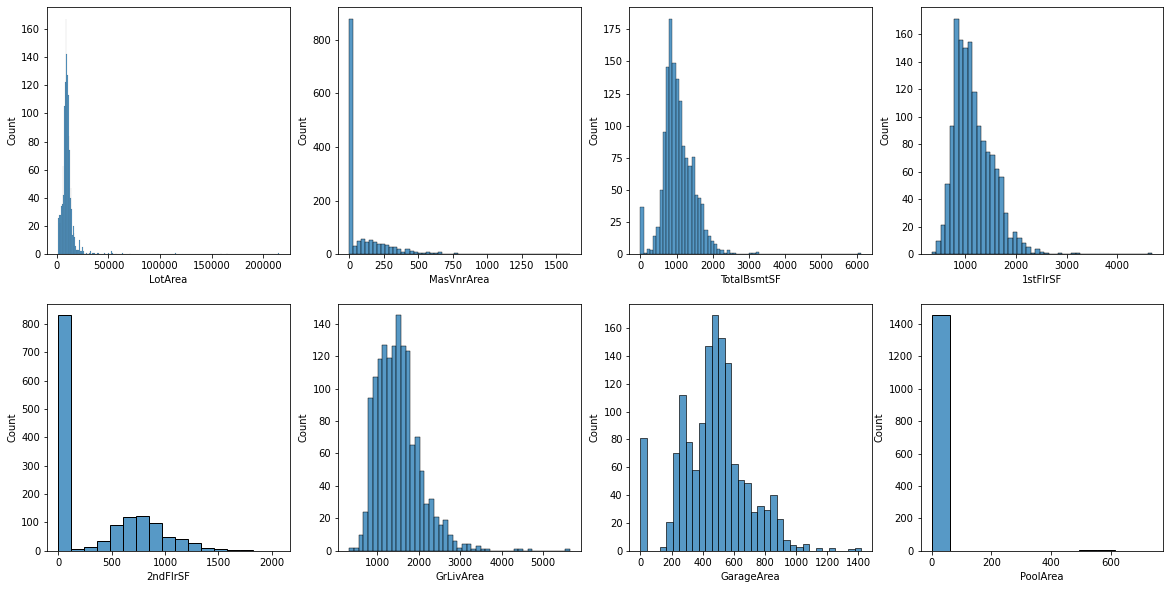

In [143]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)

for i, feature in enumerate(areaVar):
    row = int(i/4)
    col = i%4
    
    sns.histplot(x=feature, data=df, ax=axs[row][col])

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

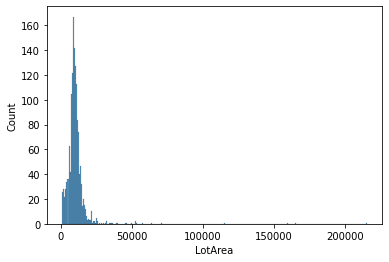

In [137]:
sns.histplot(x='LotArea', data=df)

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

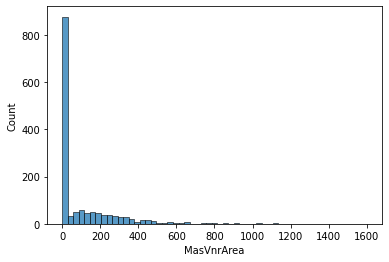

In [138]:
sns.histplot(x='MasVnrArea', data=df)

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Count'>

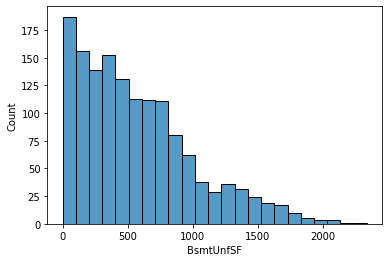

In [139]:
sns.histplot(x='BsmtUnfSF', data=df)

In [145]:
areaVar2 = df[['LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'SalePrice']]

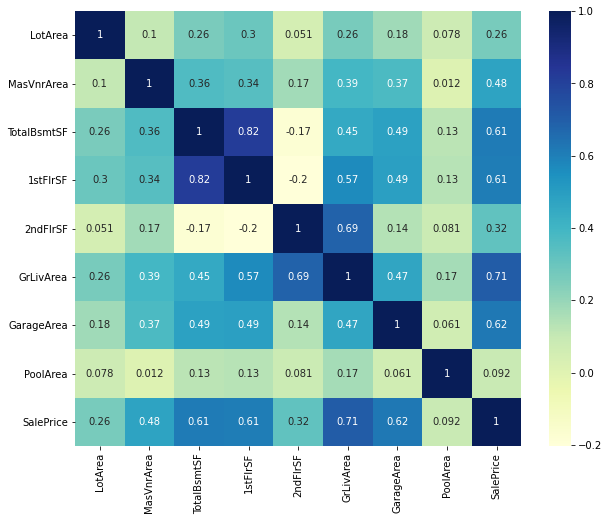

In [147]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(areaVar2.corr(), annot=True, cmap='YlGnBu', ax=ax)
plt.show()

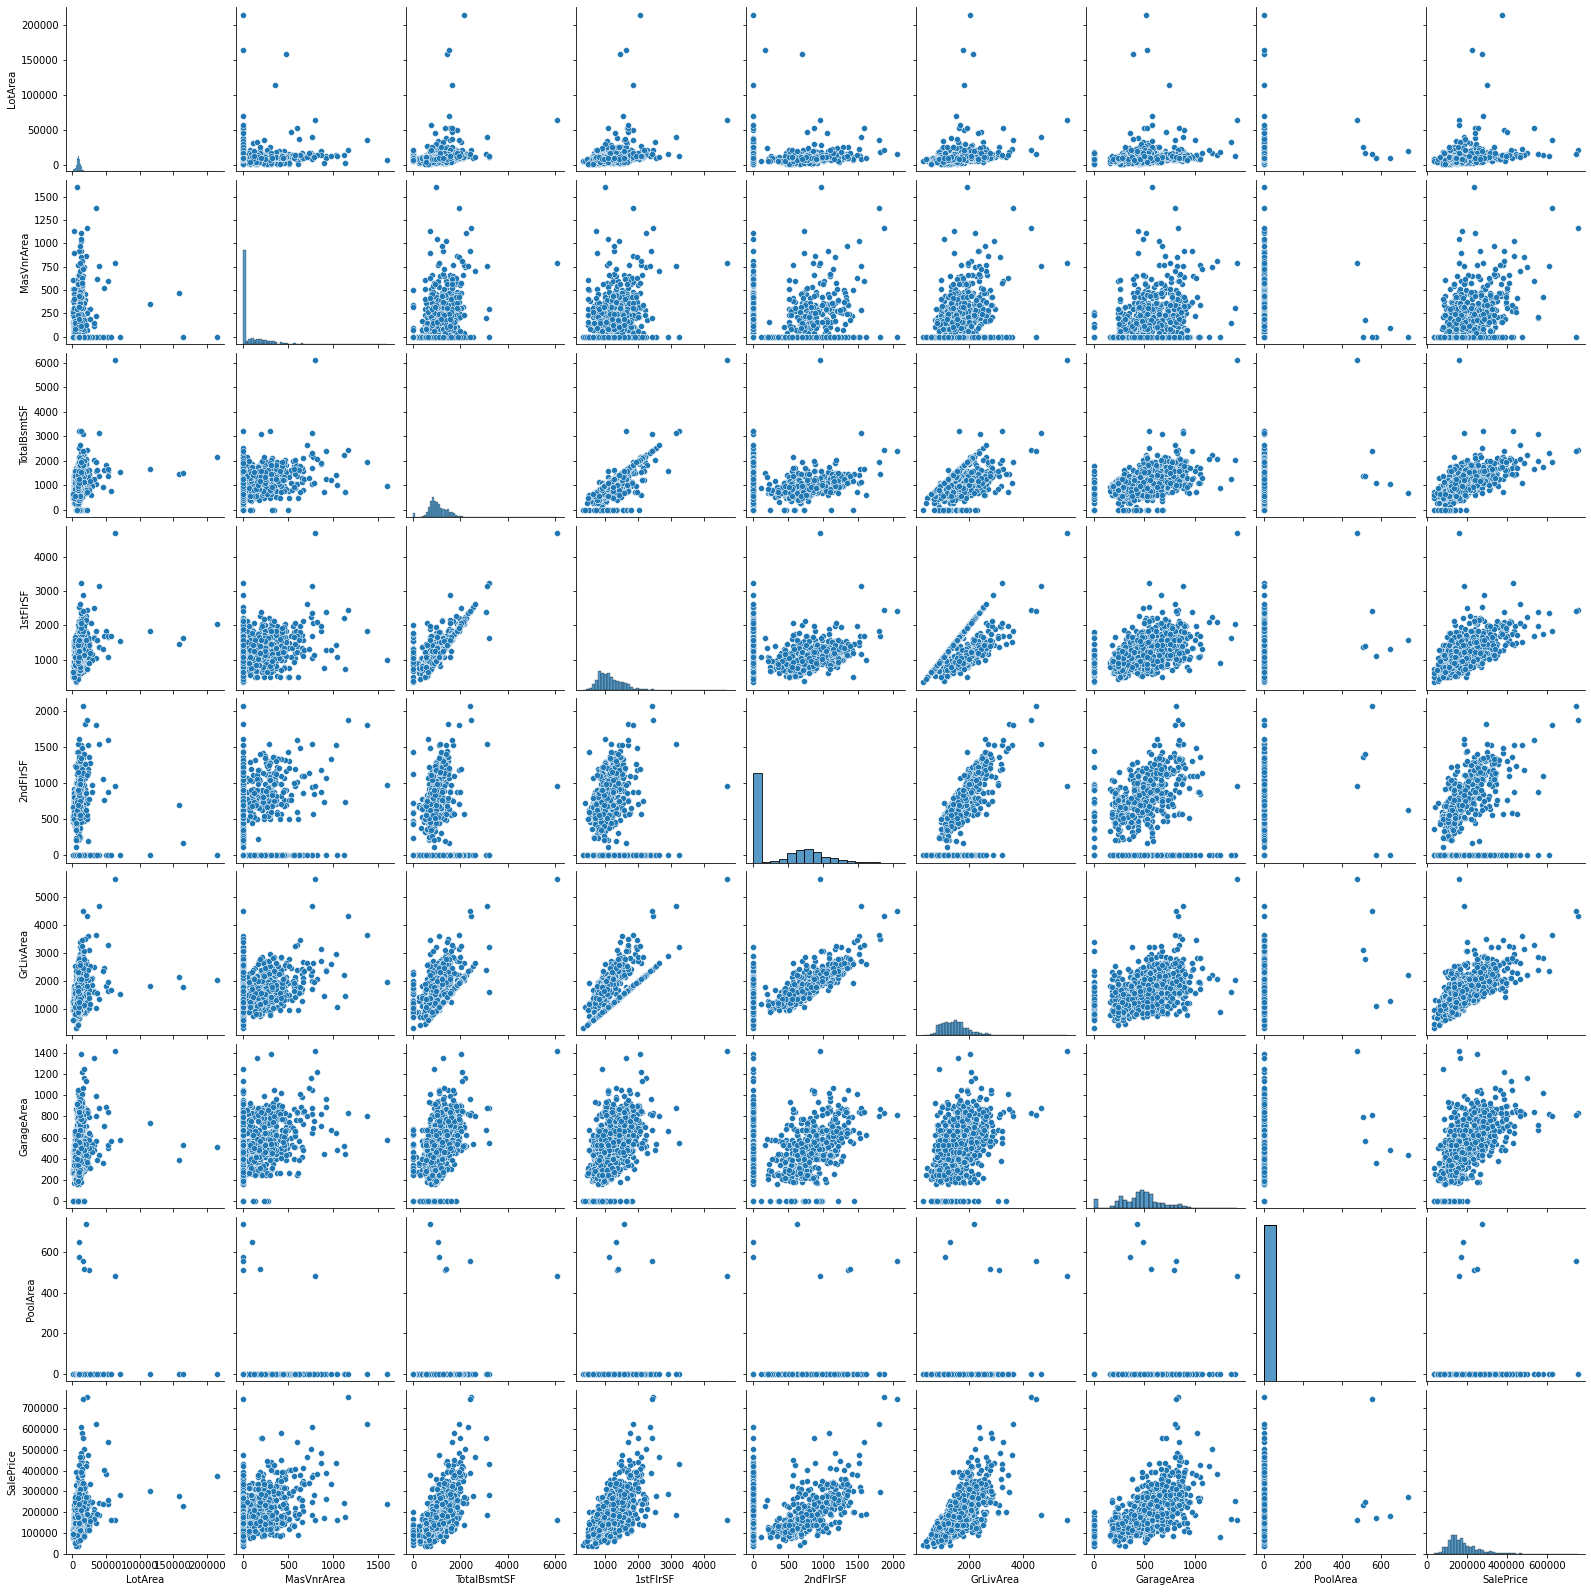

In [153]:
sns.pairplot(df, vars=areaVar2)

#### Categorical Variable

In [162]:
typeVar0 = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'Utilities', 'Neighborhood', 
           'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType', 
           'Foundation', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'Functional',
           'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType']

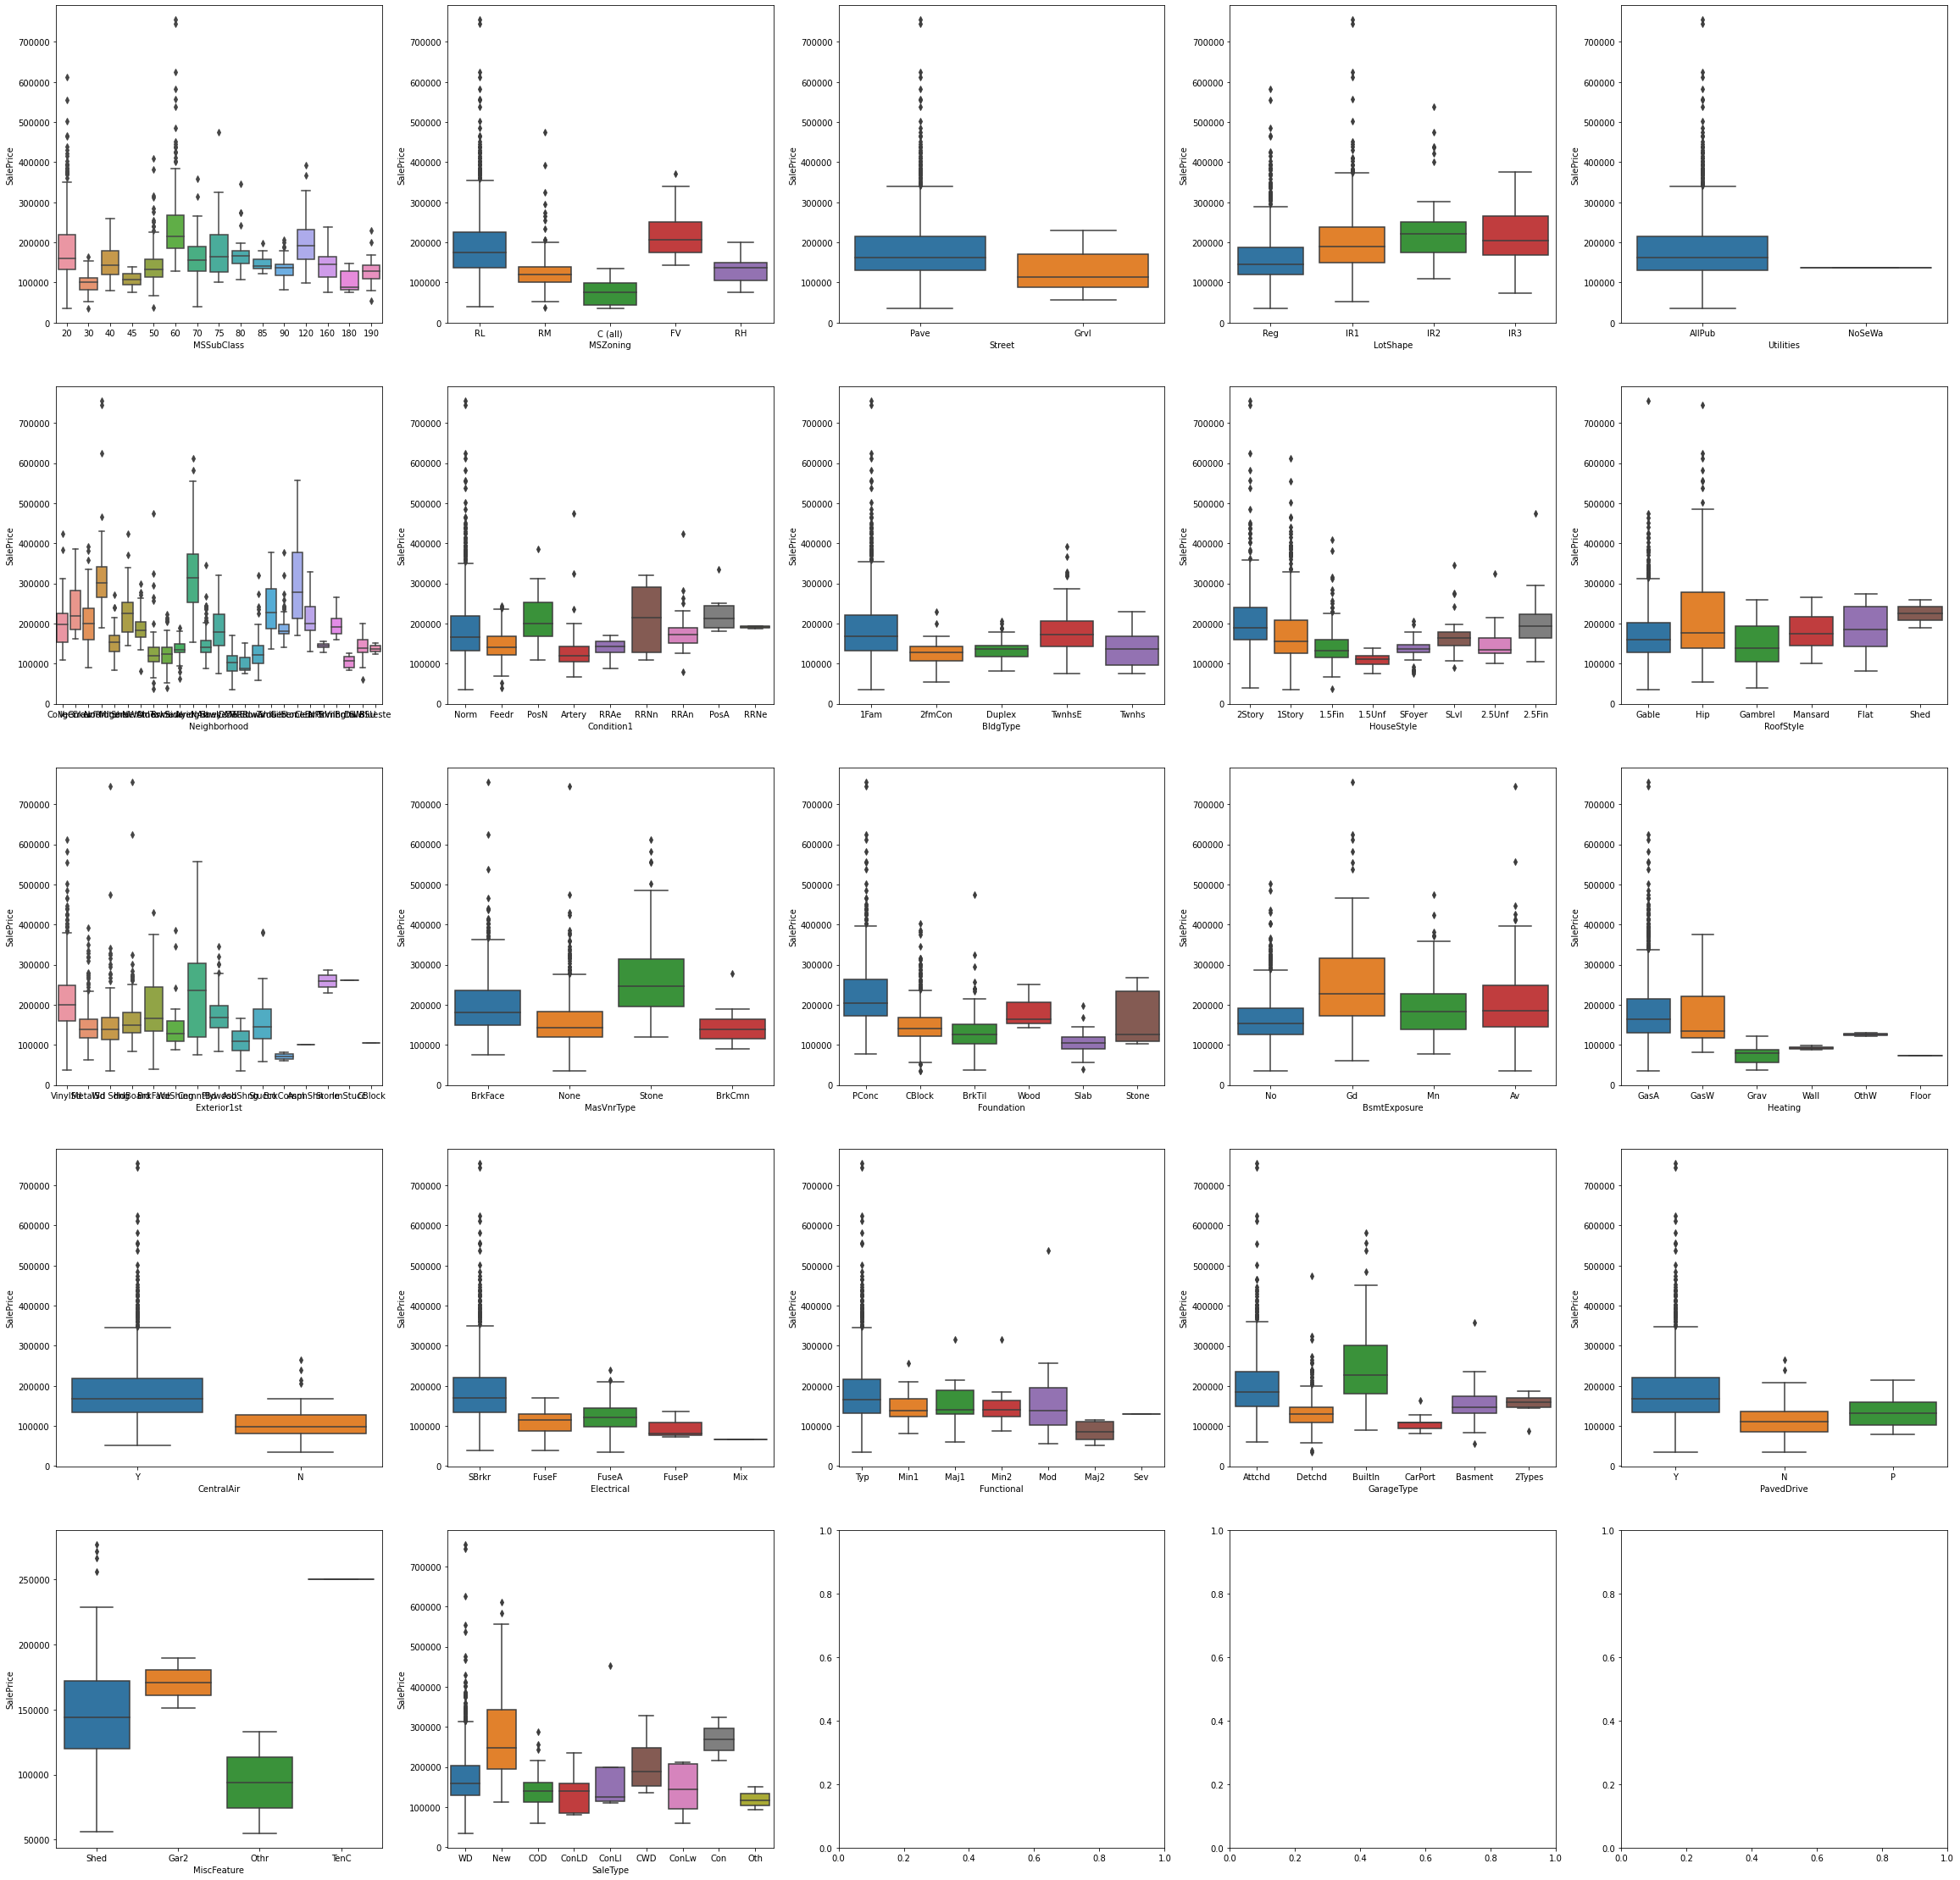

In [164]:
fig, axs = plt.subplots(figsize=(40, 40), ncols=5, nrows=5)

for i, feature in enumerate(typeVar0):
    row = int(i/5)
    col = i%5
    
    sns.boxplot(x=feature, y=df['SalePrice'], data=df, ax=axs[row][col])

In [176]:
typeVar = ['MSSubClass', 'MSZoning', 'Neighborhood',
           'HouseStyle', 'Foundation', 'GarageType', 'MiscFeature', 'SaleType']

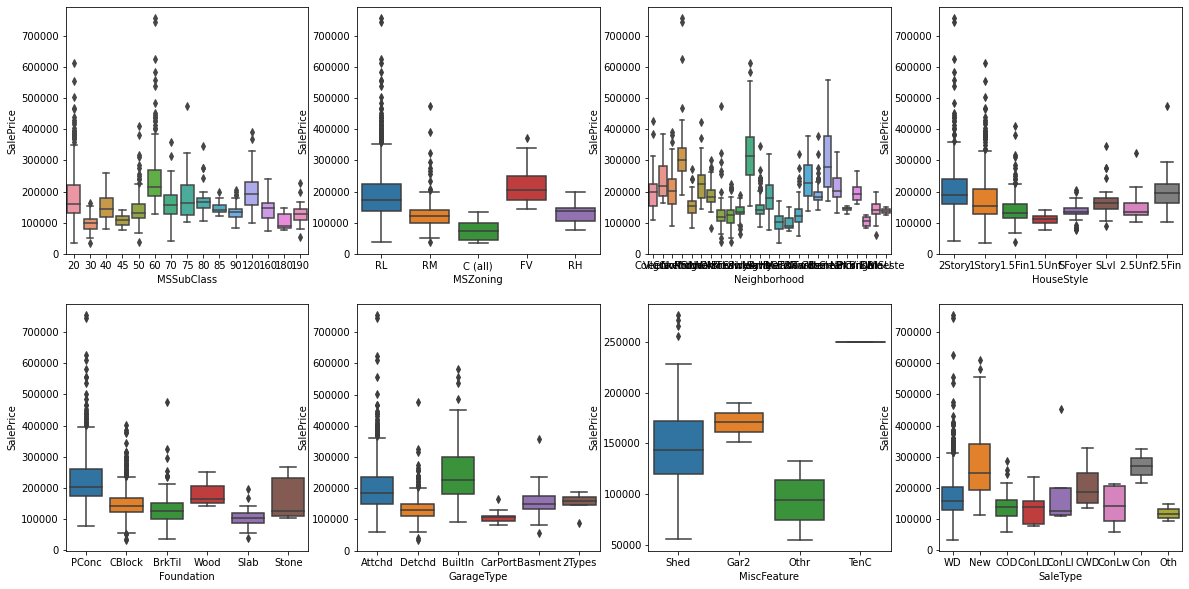

In [182]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)

for i, feature in enumerate(typeVar):
    row = int(i/4)
    col = i%4
    
    sns.boxplot(x=feature, y=df['SalePrice'], data=df, ax=axs[row][col])

In [186]:
evalVar0 = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
          'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'SaleCondition']

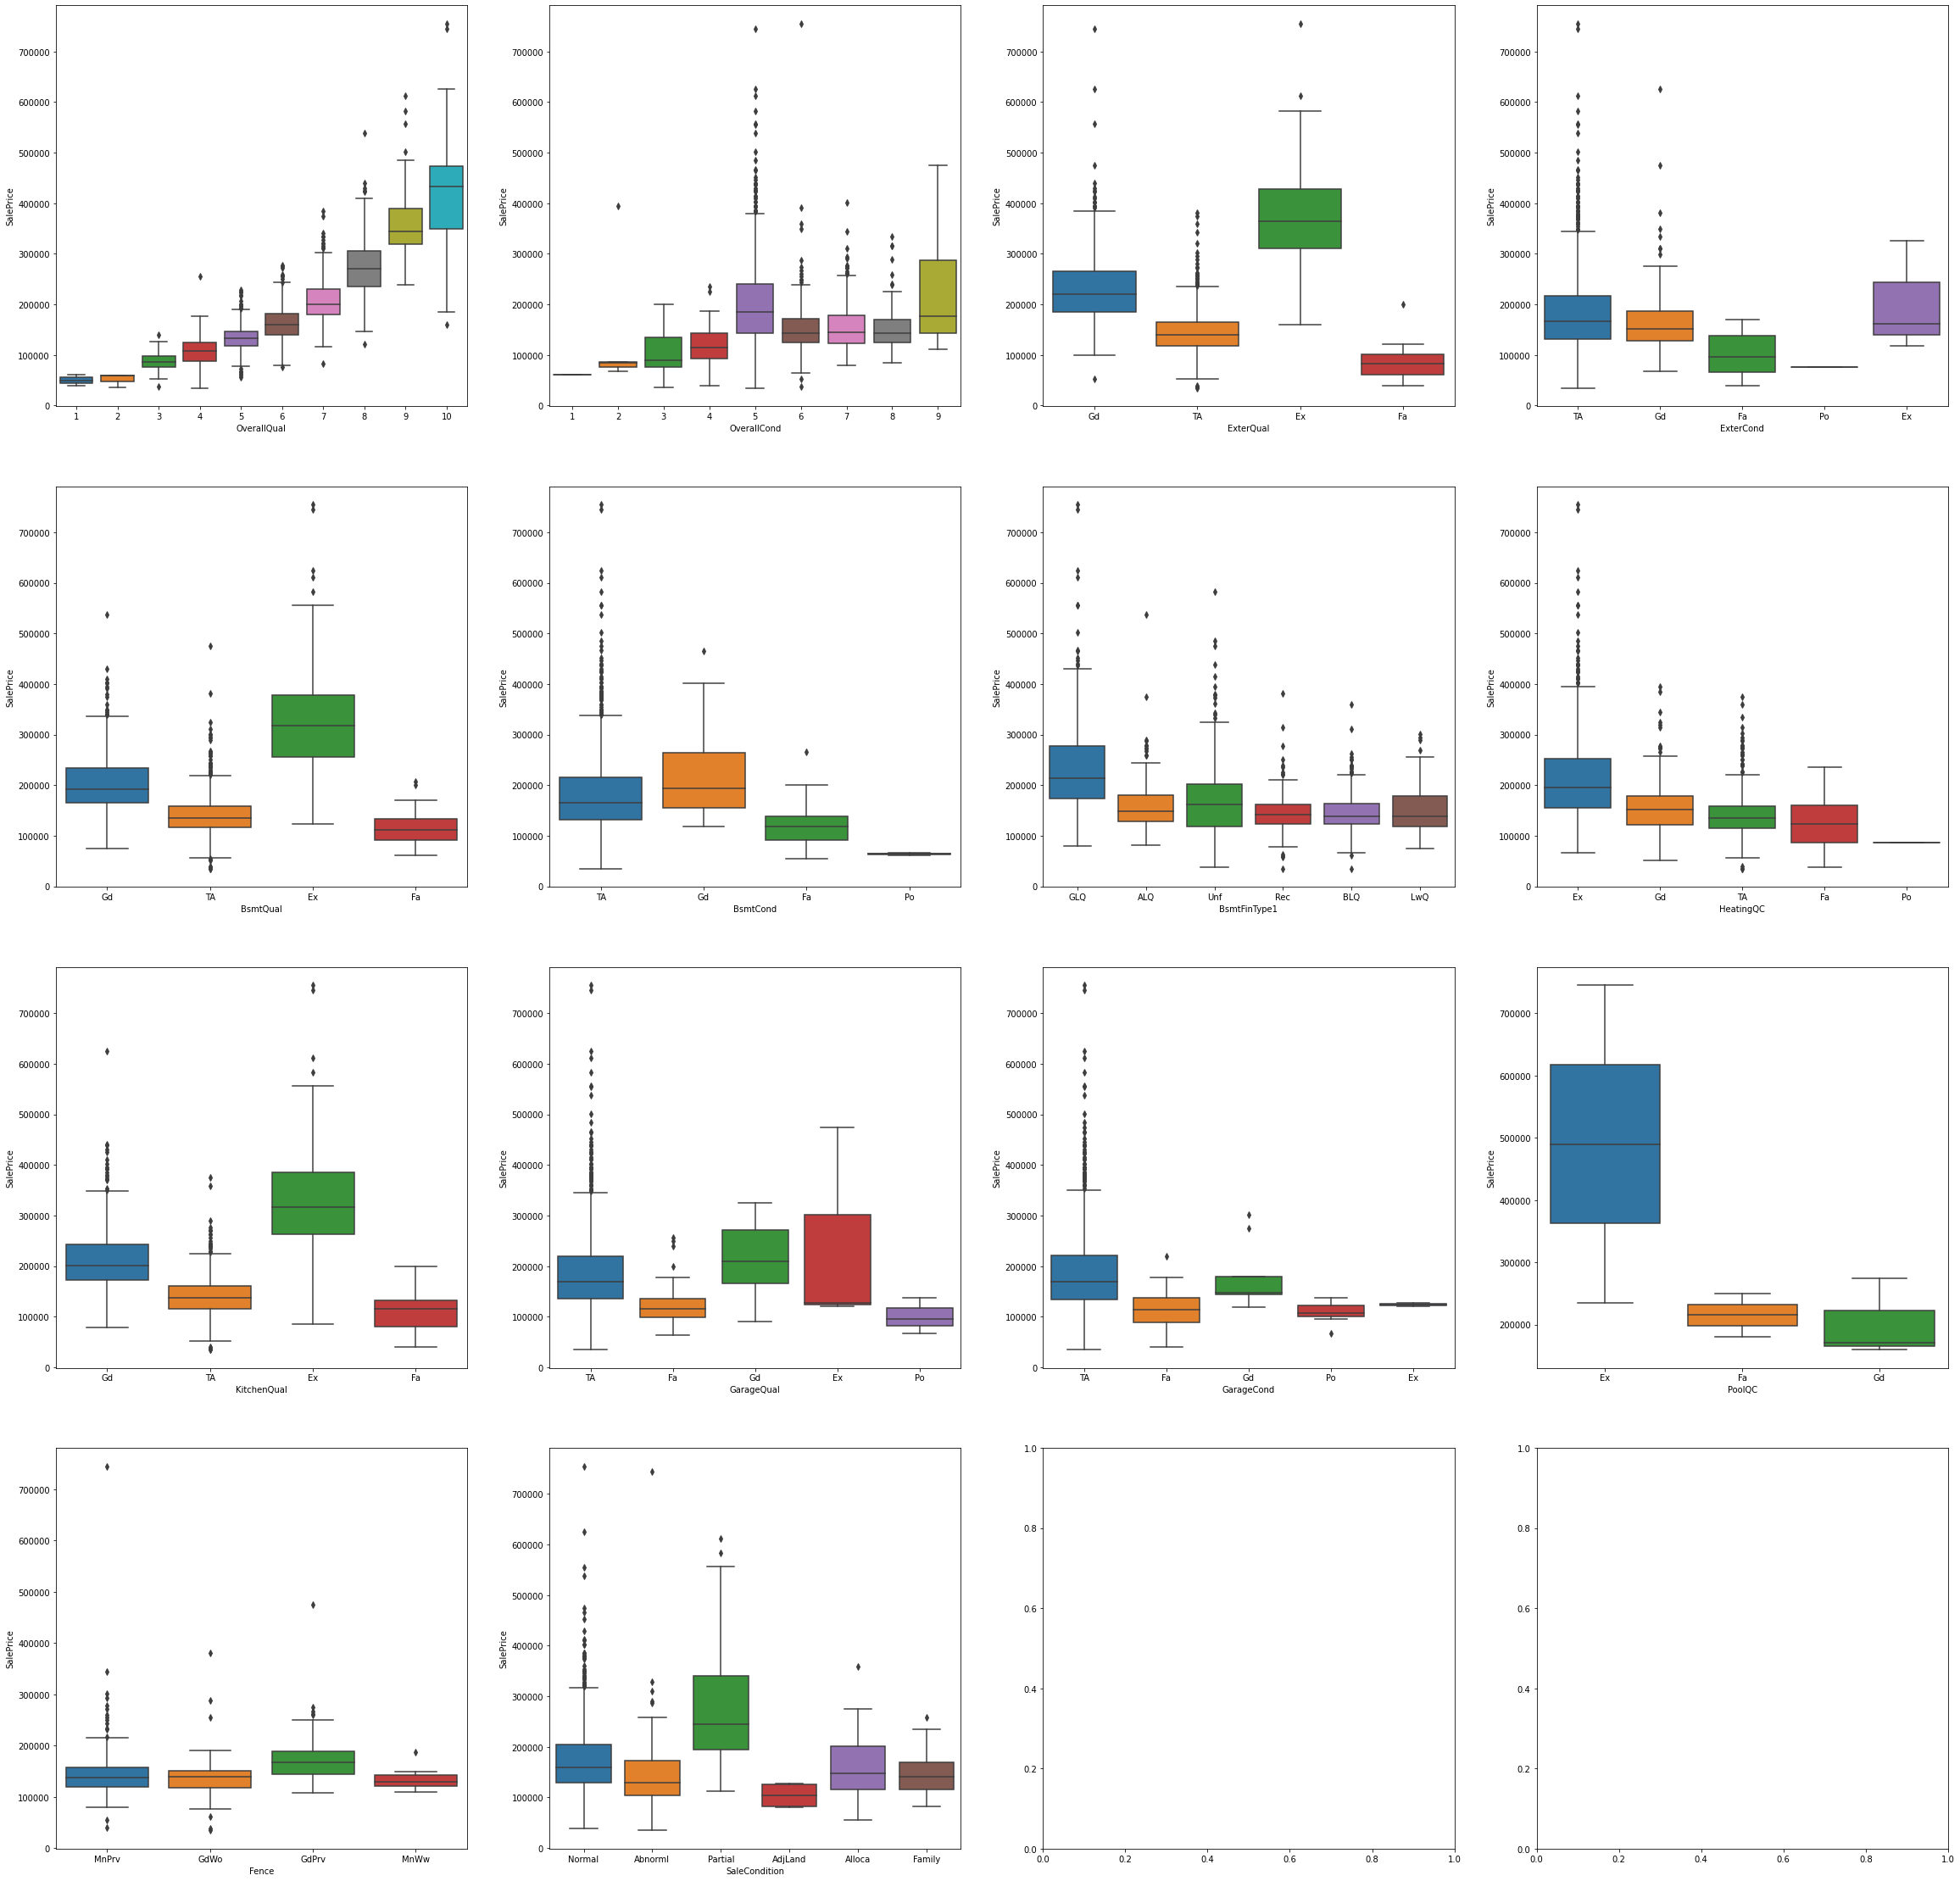

In [187]:
fig, axs = plt.subplots(figsize=(40, 40), ncols=4, nrows=4)

for i, feature in enumerate(evalVar0):
    row = int(i/4)
    col = i%4
    
    sns.boxplot(x=feature, y=df['SalePrice'], data=df, ax=axs[row][col])

In [189]:
evalVar = ['OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 
          'KitchenQual', 'GarageQual', 'PoolQC', 'SaleCondition']

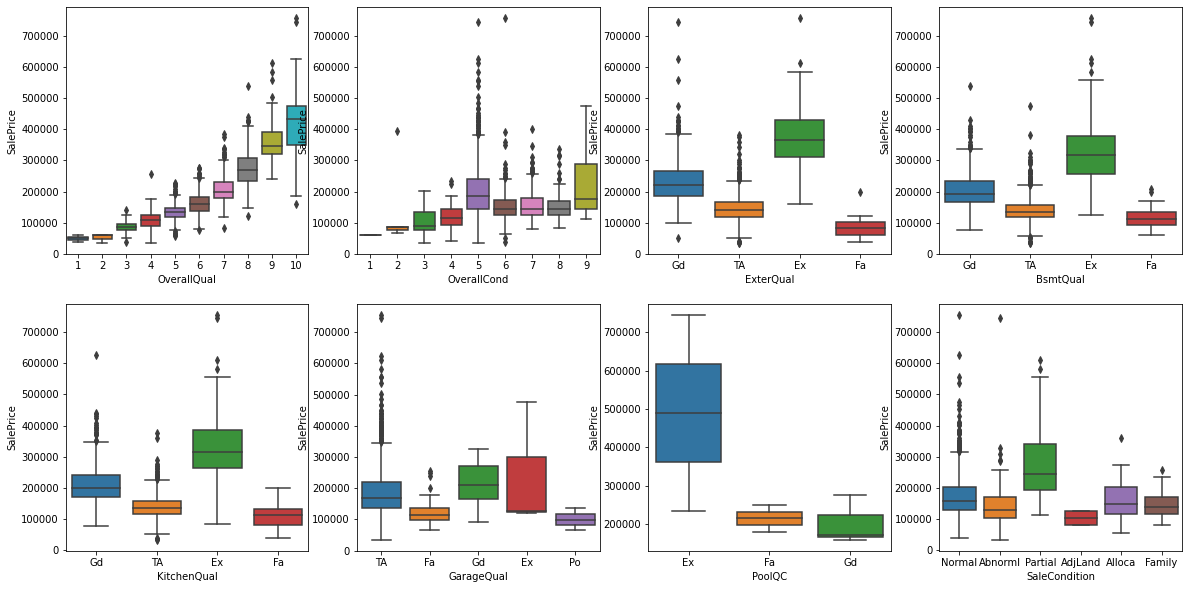

In [190]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)

for i, feature in enumerate(evalVar):
    row = int(i/4)
    col = i%4
    
    sns.boxplot(x=feature, y=df['SalePrice'], data=df, ax=axs[row][col])

In [195]:
roomVar0 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
           'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', ]

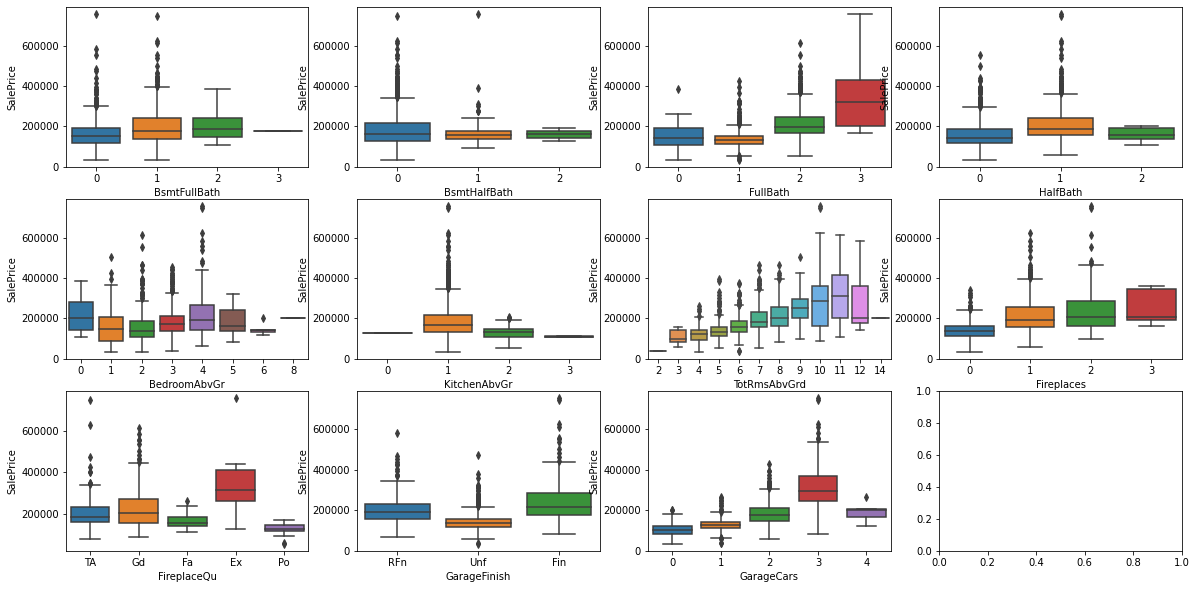

In [197]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=4, nrows=3)

for i, feature in enumerate(roomVar0):
    row = int(i/4)
    col = i%4
    
    sns.boxplot(x=feature, y=df['SalePrice'], data=df, ax=axs[row][col])

In [198]:
roomVar = ['TotRmsAbvGrd', 'FullBath', 'HalfBath', 'BedroomAbvGr',  
           'Fireplaces', 'GarageCars' ]

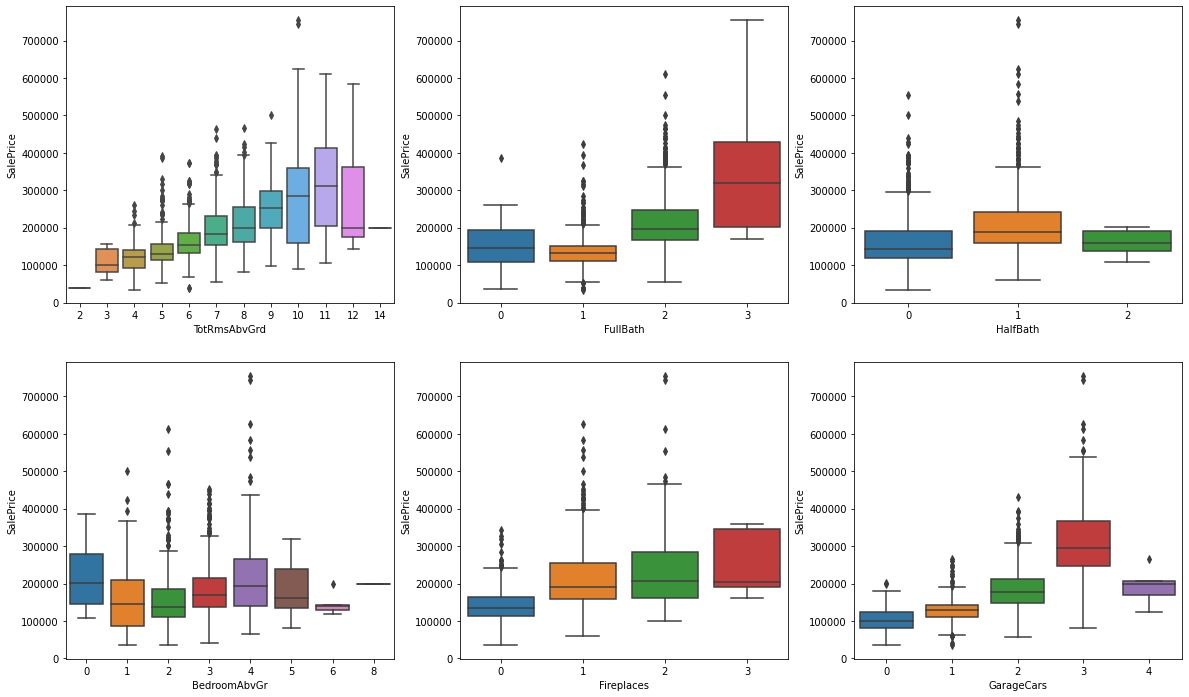

In [203]:
fig, axs = plt.subplots(figsize=(20, 12), ncols=3, nrows=2)

for i, feature in enumerate(roomVar):
    row = int(i/3)
    col = i%3
    
    sns.boxplot(x=feature, y=df['SalePrice'], data=df, ax=axs[row][col])